# Preparing for a Successful Launch: Insights from Chicago's Taxi Data
## Introduction
As Zuber prepares to launch in the Chicago area, our company needs to be able to anticipate passenger preferences and the impact of weather on trips to leverage our resources effectively in a competitive market.  This project will examine data on existing cab companies, the trips they provide, and the neighborhoods they service, in correlation with the weather at the time of the trips to uncover patterns and insights about passenger preferences that will help Zuber achieve success in the Chicago market.  In particular, I will examine the impact of weather of ride demand so that Zuber can optimize operations and position itself to achieve superior customer satisfaction.

This project will require loading, cleaning, and preparing the data sets, performing exploratory data analysis and creating visuals to support the information this analysis yields, and hypothesis testing.  The results of this analysis can then be used to inform Zuber's marketing strategies, pricing models, and leveraging of resources to position the company to meet the needs of Chicago's ride-share users.

In [2]:
# Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats as st

In [5]:
# Importing Data
cos_trips = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_01.csv')
drop_avg = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_04.csv')
loop2ohare = pd.read_csv('https://practicum-content.s3.us-west-1.amazonaws.com/learning-materials/data-analyst-eng/moved_project_sql_result_07.csv', parse_dates=['start_ts'])

In [3]:
cos_trips

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
...,...,...
59,4053 - 40193 Adwar H. Nikola,7
60,2733 - 74600 Benny Jona,7
61,5874 - 73628 Sergey Cab Corp.,5
62,"2241 - 44667 - Felman Corp, Manuel Alonso",3


In [4]:
cos_trips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [5]:
drop_avg

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
...,...,...
89,Mount Greenwood,3.137931
90,Hegewisch,3.117647
91,Burnside,2.333333
92,East Side,1.961538


In [6]:
drop_avg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


In [6]:
loop2ohare

,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0
...,...,...,...
1063,2017-11-25 11:00:00,Good,0.0
1064,2017-11-11 10:00:00,Good,1318.0
1065,2017-11-11 13:00:00,Good,2100.0
1066,2017-11-11 08:00:00,Good,1380.0


In [7]:
loop2ohare.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1068 non-null   datetime64[ns]
 1   weather_conditions  1068 non-null   object        
 2   duration_seconds    1068 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 25.2+ KB


Upon loading the datasets, we can see that we have access to data for 64 companies providing between 2 and nearly 20k trips on November 15-16, 2017 in the cos_trips dataframe.  We have data for 94 neighborhoods, averaging between 1 and over 10k dropoffs in the month of November in the drop_avg dataframe.  Additionally, we have data for ride starttime, duration, weather conditions for 1068 rides from Loop to O'Hare on Saturdays in November to allow us to test the hypothesis that weather conditions impact ride duration.  All data appears to be intact with no null values across the data sets, though there appear to be some 0 second rides in the loop2ohare dataset that should be dropped.  Helpfully, the data for cos_trips and drop_avg is already sorted in descending order.  Data types are sensible for the data they represent.  Before proceeding, I will verify that there are no duplicate rows in the dataframes.

In [10]:
# Dropping 0 second rides in loop2ohare

loop2ohare = loop2ohare.drop(loop2ohare[loop2ohare['duration_seconds'] == 0.0].index)
loop2ohare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1062 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            1062 non-null   datetime64[ns]
 1   weather_conditions  1062 non-null   object        
 2   duration_seconds    1062 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 33.2+ KB


There were six 0 second rides that have now been removed.

In [8]:
# Checking for Explicit Duplicates
cos_trips.duplicated().sum()

0

In [9]:
drop_avg.duplicated().sum()

0

In [10]:
loop2ohare.duplicated().sum()

197

In [13]:
loop2ohare.drop_duplicates(inplace=True)
loop2ohare.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 865 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   start_ts            865 non-null    datetime64[ns]
 1   weather_conditions  865 non-null    object        
 2   duration_seconds    865 non-null    float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 27.0+ KB


There were around 200 duplicates in the loop2ohare dataset.  While numerous rides could have begun in the same hour on the same day, it is doubtful they all had the exact same duration in seconds, even going from/to the same neighborhoods.  Therefore, we can reasonably remove these duplicates.  However, implicit duplicates are unlikely as the recorded weather should be the same in a given hour in a given location, so rides with different durations are most likely legitimate different rides.

In [11]:
# Checking for Implicit Duplicates
cos_trips.duplicated('company_name', keep=False).sum()

0

In [13]:
drop_avg.duplicated('dropoff_location_name', keep=False).sum()

0

The data contains no duplicates and is ready for analysis of ride trends.  In the next section, I will identify and provide graphs of the most popular dropoff areas and cab companies with the largest presence in the Chicago to  draw conclusions about the existing taxi landscape.
## Exploratory Analysis
Using the datasets, I will begin by determining the most popular neighborhoods for dropoffs so Zuber can best allocate resources, market in prime areas, and optimize routes.

### Top 10 Dropoff Areas

In [16]:
top_10_drop = drop_avg.head(10)
top_10_drop

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


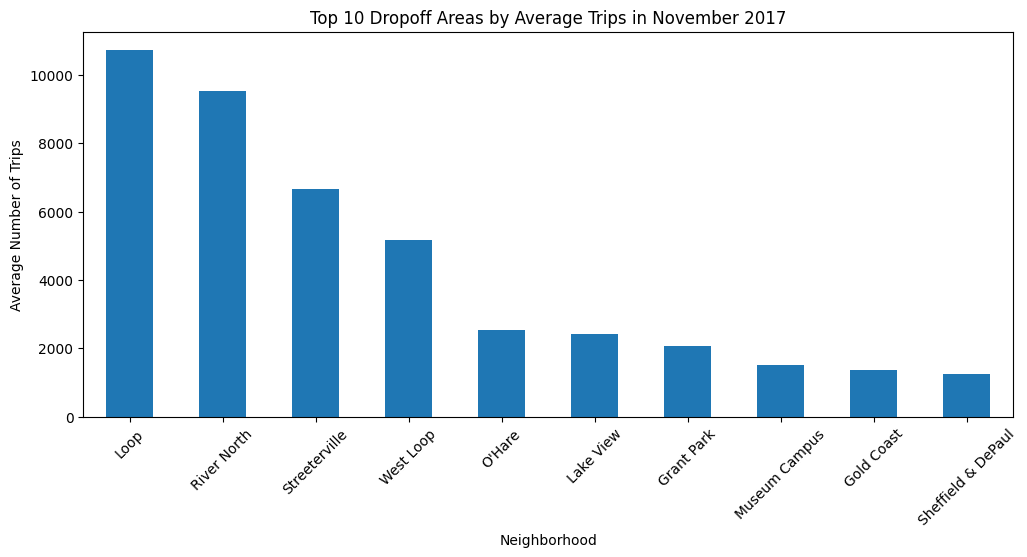

In [17]:
top_10_drop.plot(kind='bar', x='dropoff_location_name', y='average_trips', title='Top 10 Dropoff Areas by Average Trips in November 2017', xlabel='Neighborhood', ylabel='Average Number of Trips', figsize=[12, 5], rot=45, legend=False)
plt.show()

In [18]:
top_10_drop.describe()

,average_trips
count,10.000000
mean,4324.986667
std,3530.183508
min,1259.766667
25%,1649.633333
50%,2483.933333
75%,6289.416667
max,10727.466667


As Zuber plans for its launch in Chicago, the company should focus on promoting efficient and competitively-priced rides to downtown Chicago.  The top 10 destinations vary widely in volume, from Loop at over 10k trips to Sheffield & DePaul at around 10% of that number (1259).  The top 4 destinations (all in the greater downtown area) receive significantly more traffic than the other 6 destinations in the top 10.  Zuber should consider developing designated drop-off zones in the Loop, River North, Streeterville, and West Loop neighborhoods to ensure a safe and efficient experience for the large volume of customers that will likely request rides to this area based on extant taxi data.

### Top Competitors
Chicago already has over 60 taxi companies.  Knowledge of these competitors is crucial so Zuber can research ways to differentiate service, price competitively, and provide service that exceeds the quality these taxi companies currently provide.

In [19]:
top_cos = cos_trips.head(10)
top_cos

,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasin,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299
5,Chicago Carriage Cab Corp,9181
6,City Service,8448
7,Sun Taxi,7701
8,Star North Management LLC,7455
9,Blue Ribbon Taxi Association Inc.,5953


In [20]:
top_cos.describe()

,trips_amount
count,10.000000
mean,9927.200000
std,3729.509703
min,5953.000000
25%,7887.750000
50%,9240.000000
75%,10247.250000
max,19558.000000


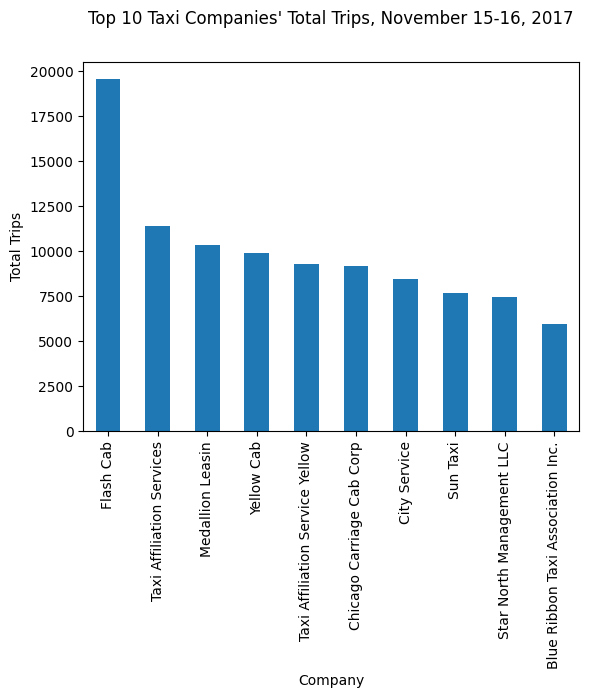

In [21]:
top_cos.plot(kind='bar', x='company_name', y='trips_amount', legend=False)
plt.title("Top 10 Taxi Companies' Total Trips, November 15-16, 2017", y=1.08)
plt.xlabel('Company')
plt.ylabel('Total Trips')
plt.show()

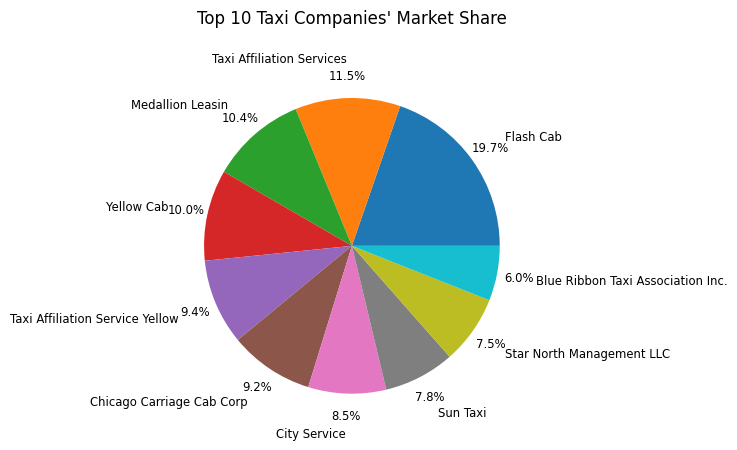

In [22]:
top_cos.plot(kind='pie', y='trips_amount', autopct='%1.1f%%', labels=top_cos['company_name'], legend=False, pctdistance=1.15, labeldistance=1.27, textprops={'size': 'smaller'})
plt.title("Top 10 Taxi Companies' Market Share", y=1.08)
plt.ylabel('')
plt.show()

While there are several strong competitors in the Chicago taxi market, Flash Cab is clearly the strongest of the strong.  Boasting nearly 20k rides across two weekdays in November, or approximately 20% of the rides provided by the top 10 providers, Flash Cab is clearly doing something right.  Our team will need to evaluate Flash Cab's services to identify gaps where Zuber can provide superior innovation and strategize ways to market to this sizable demographic.  Taxi Affiliation Services (11k rides, 11.5% marketshare) and Medallion Leasin (10k rides, 10% marketshare) are also strong competitors in the Chicago marketplace.  Identifying differences in marketing strategy in comparison to Flash Cab will help Zuber to better align advertisement to consumer preferences.  Sun Taxi, Star North, and Blue Ribbon--as strong but less competitive services--may have logistics worth analyzing for weak points that Zuber should avoid to ensure it dominates the marketplace.

## Testing Hypotheses

Do rainy days cause longer rides on Saturdays?  I will perform a statistical test using the loop2ohare data to evaluate the impact of rain on ride duration so Zuber will know how many drivers are needed to cover these routes efficiently.

To test this hypothesis, I will use a typical alpha threshold of 0.05 to ensure any difference identified is statistically significant and worth rejecting the null hypothesis.  I am assuming the variances of populations on these days may not be equal due to the fact this data is from November, during which the major Thanksgiving holiday occurs, affecting the volume of traffic for the surrounding weekends and thereby having a potentially significant effect on the data groups, depending on the weather on those Saturdays.

Null hypothesis: The average duration of rides from the Loop to O'Hare International Airport does not change on rainy Saturdays.

Alternative hypothesis: The average duration of rides from the Loop to O'Hare International Airport changes on rainy Saturdays.

In [34]:
rain = loop2ohare[loop2ohare['weather_conditions'] == 'Bad']
no_rain = loop2ohare[loop2ohare['weather_conditions'] == 'Good']
rain_trips = rain['duration_seconds'].values
no_rain_trips = no_rain['duration_seconds'].values
alpha = 0.05
results = st.ttest_ind(rain_trips, no_rain_trips, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('We reject the null hypothesis.')
else:
    print('We cannot reject the null hypothesis.')
rain_trips_mean = rain_trips.mean()
nrt_mean = no_rain_trips.mean()
print(f'Trips on rainy days averaged {rain_trips_mean:.0f} seconds.  Trips on days without rain averaged {nrt_mean:.0f} seconds.')

p-value: 2.859195727873403e-07
We reject the null hypothesis.
Trips on rainy days averaged 2409 seconds.  Trips on days without rain averaged 2049 seconds.


There is a difference in trip length on rainy days versus days without rain.  On average, a trip on rainy days lasts 6 minutes longer than a trip on a day without rain... that can add up!  Zuber needs to ensure additional drivers are available on rainy Saturdays to help cover this route.

# Conclusion

This analysis will help Zuber identify additional areas to study and has provided some initial insights into passenger preferences and the impact of weather on services.  Zuber can use this information in correlation with additional inquiry to plan how to most strategically leverage our innovative technology in the competitive Chicago market.

Analysis of popular drop-off areas revealed that the top destinations are concentrated in the greater downtown area, with Loop, River North, Streeterville, and West Loop being the most popular. These areas account for a significant volume of rides, indicating high demand for transportation services. Zuber should focus on these neighborhoods for resource allocation, marketing efforts, and route optimization to ensure a safe and efficient experience for customers.

The Chicago taxi market is competitive, with over 60 taxi companies. Flash Cab stands out as the strongest competitor, providing nearly 20k rides across two weekdays in November. Other significant competitors include Taxi Affiliation Services and Medallion Leasin. Understanding the strengths and weaknesses of these competitors will help Zuber differentiate its services, price competitively, and attract customers. Analyzing logistics and marketing strategies of both top competitors and lesser competitors like Sun Taxi, Star North, and Blue Ribbon will provide insights for Zuber to provide an improved experience for passengers in Chicago.

I also conducted a statistical test to evaluate the impact of rain on ride duration for trips from the Loop to O'Hare International Airport on Saturdays. The difference is statistically significant enough to reject the null hypothesis as rides on rainy days are, on average, 6 minutes longer than those on non-rainy days. Zuber should ensure additional drivers are available on rainy Saturdays to efficiently cover this route and meet increased demand.

This analysis of existing cab companies, trip patterns, and weather impacts has provided initial insight into the transportation landscape of Chicago.  Additional inquiry based on this analysis will help Zuber prepare to launch successfully in Chicago by offering more efficient, competitively priced rides to passengers.